<a href="https://colab.research.google.com/github/Miss-Pradhi/ML-LAB-Assignment/blob/main/LAB-6_Implement_Supervised_KNN_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit the StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data split and scaled successfully.")
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Data split and scaled successfully.
X_train_scaled shape: (105, 4)
X_test_scaled shape: (45, 4)
y_train shape: (105,)
y_test shape: (45,)


In [24]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate a KNeighborsClassifier with n_neighbors=5
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the k-NN classifier on the scaled training data
knn_classifier.fit(X_train_scaled, y_train)

print("k-NN classifier trained successfully.")

k-NN classifier trained successfully.


In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

# Make predictions on the scaled test data
y_pred_knn = knn_classifier.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

# Generate confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

print(f"k-NN Classifier Performance:")
print(f"  Accuracy: {accuracy_knn:.4f}")
print(f"  Precision: {precision_knn:.4f}")
print(f"  Recall: {recall_knn:.4f}")
print(f"  F1-Score: {f1_knn:.4f}")
print("  Confusion Matrix:\n", conf_matrix_knn)

k-NN Classifier Performance:
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000
  Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [26]:
from sklearn.svm import SVC

# Instantiate an SVC with C=1.0 and kernel='rbf'
svm_classifier = SVC(C=1.0, kernel='rbf', random_state=42)

# Train the SVM classifier on the scaled training data
svm_classifier.fit(X_train_scaled, y_train)

print("SVM classifier trained successfully.")

SVM classifier trained successfully.


In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

# Make predictions on the scaled test data
y_pred_svm = svm_classifier.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

# Generate confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

print(f"SVM Classifier Performance:")
print(f"  Accuracy: {accuracy_svm:.4f}")
print(f"  Precision: {precision_svm:.4f}")
print(f"  Recall: {recall_svm:.4f}")
print(f"  F1-Score: {f1_svm:.4f}")
print("  Confusion Matrix:\n", conf_matrix_svm)

SVM Classifier Performance:
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000
  Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


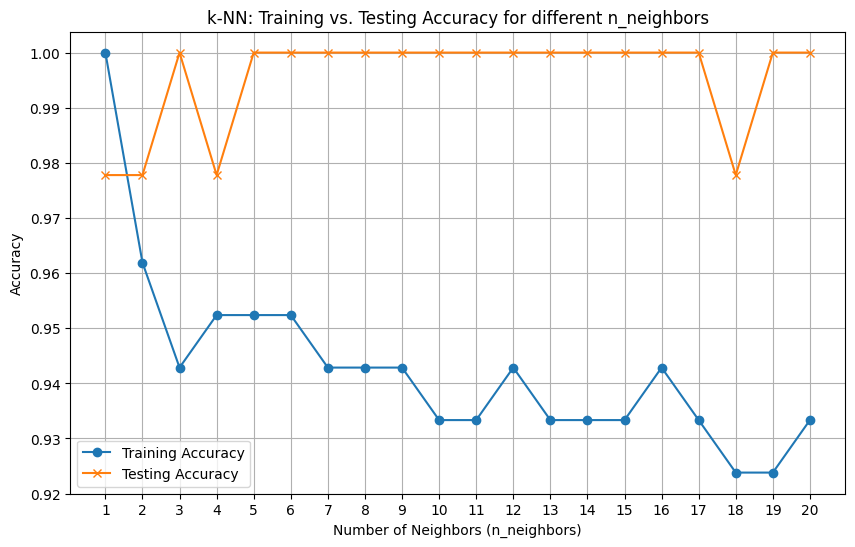

k-NN hyperparameter tuning for n_neighbors completed and visualized.


In [28]:
import matplotlib.pyplot as plt

# Lists to store accuracies
train_accuracies_knn = []
test_accuracies_knn = []
n_neighbors_range = range(1, 21) # Test n_neighbors from 1 to 20

for k in n_neighbors_range:
    # Instantiate KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the model
    knn.fit(X_train_scaled, y_train)

    # Calculate training accuracy
    y_train_pred_knn = knn.predict(X_train_scaled)
    train_accuracies_knn.append(accuracy_score(y_train, y_train_pred_knn))

    # Calculate testing accuracy
    y_test_pred_knn = knn.predict(X_test_scaled)
    test_accuracies_knn.append(accuracy_score(y_test, y_test_pred_knn))

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(n_neighbors_range, train_accuracies_knn, label='Training Accuracy', marker='o')
plt.plot(n_neighbors_range, test_accuracies_knn, label='Testing Accuracy', marker='x')
plt.title('k-NN: Training vs. Testing Accuracy for different n_neighbors')
plt.xlabel('Number of Neighbors (n_neighbors)')
plt.ylabel('Accuracy')
plt.xticks(list(n_neighbors_range))
plt.grid(True)
plt.legend()
plt.show()

print("k-NN hyperparameter tuning for n_neighbors completed and visualized.")

Starting SVM hyperparameter tuning...


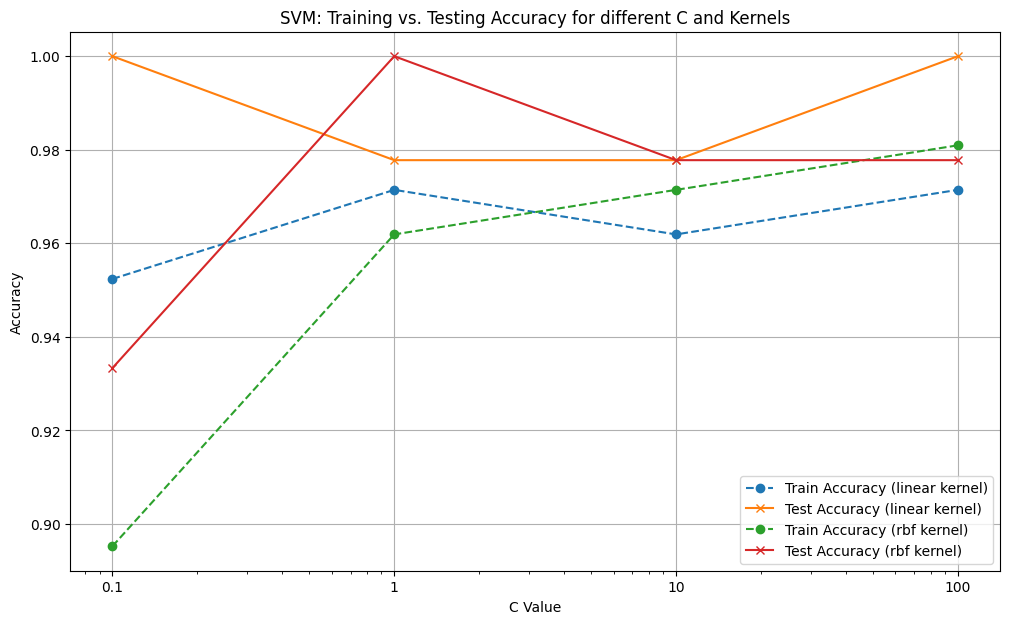

SVM hyperparameter tuning for C and kernel completed and visualized.


In [29]:
import matplotlib.pyplot as plt

# Define parameter ranges
C_values = [0.1, 1, 10, 100]
kernels = ['linear', 'rbf']

# Dictionaries to store accuracies for plotting
train_accuracies_svm = {kernel: [] for kernel in kernels}
test_accuracies_svm = {kernel: [] for kernel in kernels}

print("Starting SVM hyperparameter tuning...")

for kernel in kernels:
    for C in C_values:
        # Instantiate SVC with current parameters
        svm = SVC(C=C, kernel=kernel, random_state=42)

        # Train the model
        svm.fit(X_train_scaled, y_train)

        # Calculate training accuracy
        y_train_pred_svm = svm.predict(X_train_scaled)
        train_accuracies_svm[kernel].append(accuracy_score(y_train, y_train_pred_svm))

        # Calculate testing accuracy
        y_test_pred_svm = svm.predict(X_test_scaled)
        test_accuracies_svm[kernel].append(accuracy_score(y_test, y_test_pred_svm))

# Plotting the results
plt.figure(figsize=(12, 7))

for kernel in kernels:
    plt.plot(C_values, train_accuracies_svm[kernel], label=f'Train Accuracy ({kernel} kernel)', marker='o', linestyle='--')
    plt.plot(C_values, test_accuracies_svm[kernel], label=f'Test Accuracy ({kernel} kernel)', marker='x')

plt.title('SVM: Training vs. Testing Accuracy for different C and Kernels')
plt.xlabel('C Value')
plt.ylabel('Accuracy')
plt.xscale('log') # C values are often best viewed on a log scale
plt.xticks(C_values, labels=[str(c) for c in C_values])
plt.grid(True)
plt.legend()
plt.show()

print("SVM hyperparameter tuning for C and kernel completed and visualized.")